In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Findings:

            EDA Findings
            1) Median range of Max Bookees is 30.
            2) Median Booking is around 16, Average is 17
            3) Median Pricing is 1499 and average is 1850.
            4) Median and average Booking occured in 20th week of 2018
            5) Average occupancy is 57% and Medaian is 55%
            6) Average Revenue generated is 30,202, Median is 26982
            7) Most Activities conducted Site is HXP
            8) Most Activity Across sites is Body Conditioning 10-11am
            9) Maximum Activity are booked for the timr slot of 10 am
            10) Majority Activities are conducted on Wednesdays
            Bivirate
            11) Maximum Booking has been collected by BRP
            12) HXP,TSC,NBL conducts Activities with average price of 1850
            13) 'M M A Cond', 'Junior Swimfit','Family Bootcamp', 'Insanity','Tai Chi', 'Tai-Chi ' are the Activity with highest pricing
            14) 'Pilates' is the activity generating maximum revenue and 'AquaBabies', 'Aquafit', 'ABS Blast' are the least Revenue generating Activities
            15) 20-20-20 are the least priced activity all over the sites
            16) Maximum bookings are happening on tuesday and Wednesday, least on Sunday
            17) Best Occupany is found at 1500, at 1000 Occupany shows the most cause maxbookees were very less
            18) Maximum Bookings occurs at the price of 1500 followed by 2000, and eventually decreases when price rises.
            19) Body Attack has most average bookings, following Fusion.
            20) Body Attack is the top Occupied Activities
            21) 'ABS Blast' has least average bookings followed by 'Junior Swimfit'.
            22) Family Bootcamps are least Occupied Activities
            23) April Month had msot booking and its decreasing over time
            24) Maximum Bookings are Occured on 17yh week of the year that is 23rd to 29th of April
            25) Maximum Average Occupancy is at 8 am followed by 7pm,6.15pm,1,10pm...
            26) Total Bookgs are held for 10 am Activities
            27) Most Revenue genrating evets are cunducted at 10.45 and least are form morning 7.15,7.46,9.45am and 2.15pm.
            28) High Pricing Activity are conducted on 8.30am and least pricing avtivity are in early morning and at afternoon
            Price Easticity
            29) Every +1% change in Occupancy will bring +97% change in Bookings
            30) Every +1% change in Price will bring -6% change in Bookings
            31) Every +1% change is Activity in Activity Site will bring +ve change Bookings
            32) Every +1% change is Activity on week days (Sunday,Thurday) will bring +be change in Bookings
            

In [34]:
# Importing librariee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_excel('D:/UpGrad/Cult Fit Project/Solution/Cleaned_classes.xlsx')

In [36]:
df.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Activity,Day,Week,Month,Occupancy,Revenue
0,HXP,20-20-20 2.45pm-3.45pm,2018-04-08,14:45:00,25,12,499,20-20-20,Sunday,14,4,0.48,5988
1,HXP,20-20-20 2.45pm-3.45pm,2018-04-15,14:45:00,25,15,499,20-20-20,Sunday,15,4,0.60,7485
2,HXP,20-20-20 2.45pm-3.45pm,2018-04-22,14:45:00,25,14,499,20-20-20,Sunday,16,4,0.56,6986
3,HXP,20-20-20 2.45pm-3.45pm,2018-04-29,14:45:00,25,9,499,20-20-20,Sunday,17,4,0.36,4491
4,HXP,20-20-20 2.45pm-3.45pm,2018-05-06,14:45:00,25,7,499,20-20-20,Sunday,18,5,0.28,3493


In [37]:
df[(df['Occupancy'] <= 0.2)].head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Activity,Day,Week,Month,Occupancy,Revenue
7,HXP,20-20-20 2.45pm-3.45pm,2018-05-27,14:45:00,25,3,499,20-20-20,Sunday,21,5,0.12,1497
34,SBP,20-20-20 9.30-10.30am,2018-05-30,9:30:00,35,7,499,20-20-20,Wednesday,22,5,0.20,3493
102,SBP,Abs Blast 7.45-8.15am,2018-04-03,7:45:00,20,4,999,ABS Blast,Tuesday,14,4,0.20,3996
103,SBP,Abs Blast 7.45-8.15am,2018-04-10,7:45:00,20,1,999,ABS Blast,Tuesday,15,4,0.05,999
104,SBP,Abs Blast 7.45-8.15am,2018-04-17,7:45:00,20,2,999,ABS Blast,Tuesday,16,4,0.10,1998


In [38]:
def dynamic_price_rule(df):
    base_price        = df['Price (INR)']
    price        = df['Price (INR)']
    occ          = df["Occupancy"]      # in %
    weekday      = df["Day"]        # e.g. 'Mon','Tue',...
    time_slot    = df["BookingStartTime"]      # e.g. '10:00'
    activity     = df["Activity"]
    site         = df['ActivitySiteID']
    revenue      = df['Revenue']

    # start with 0% change
    factor = 0.0

    # -------- occupancy based --------
    if occ < 0.2:
        if price > 1500:
            factor -= 0.1    # -10%
        else:
            factor -= 0.05    # -5%
    elif 0.2 <= occ <= 0.6:
        factor += 0.00        # no change
    elif 0.6 < occ <= 0.8:
        factor += 0.03        # +3%
    else:  # occ > 0.8
        factor += 0.05        # +5%

    # -------- time-of-day based --------
    peak_slots = ["08:00", "10:00", "10:45"]
    weak_slots = ["07:15", "07:45", "09:45", "14:15"]

    if time_slot in peak_slots:
        factor += 0.03        # +3% extra
    elif time_slot in weak_slots:
        factor -= 0.03        # -3% extra

    # -------- day-of-week based --------
    if weekday in ["Tue", "Wed"]:
        factor += 0.03        # +3%
    elif weekday == "Sun":
        factor -= 0.03        # -3%

    # -------- activity-level tweaks --------
    hero_acts   = ["Body Attack", "Pilates", "Fusion"]
    weak_acts   = ["Family Bootcamp", "ABS Blast", "Junior Swimfit",
                   "AquaBabies", "Aquafit"]

    if activity in hero_acts:
        factor += 0.03        # slightly more aggressive up
    if activity in weak_acts:
        factor -= 0.03        # slightly more discount

    revenue_median = 26982 
     # -------- COMBO: HXP + High Revenue = extra boost --------
    if site == "HXP" and revenue > revenue_median * 1.5:
        factor += 0.02        # Extra +2%
    # -------- clip total factor (e.g. -15% to +10%) --------
    factor = max(-0.15, min(0.10, factor))

    new_price = base_price * (1 + factor)
    return round(new_price, 2)


In [39]:
df["recommended_price"] = df.apply(dynamic_price_rule, axis=1)

In [40]:
df[['Price (INR)','recommended_price']][df['Price (INR)'] != df['recommended_price']]

,Price (INR),recommended_price
7,499,474.05
17,499,513.97
19,499,513.97
35,499,523.95
36,499,513.97
...,...,...
3262,1999,2098.95
3263,1999,2058.97
3264,1999,2098.95
3265,1999,2098.95


<Axes: xlabel='BookingEndDateTime (Month / Day / Year)', ylabel='recommended_price'>

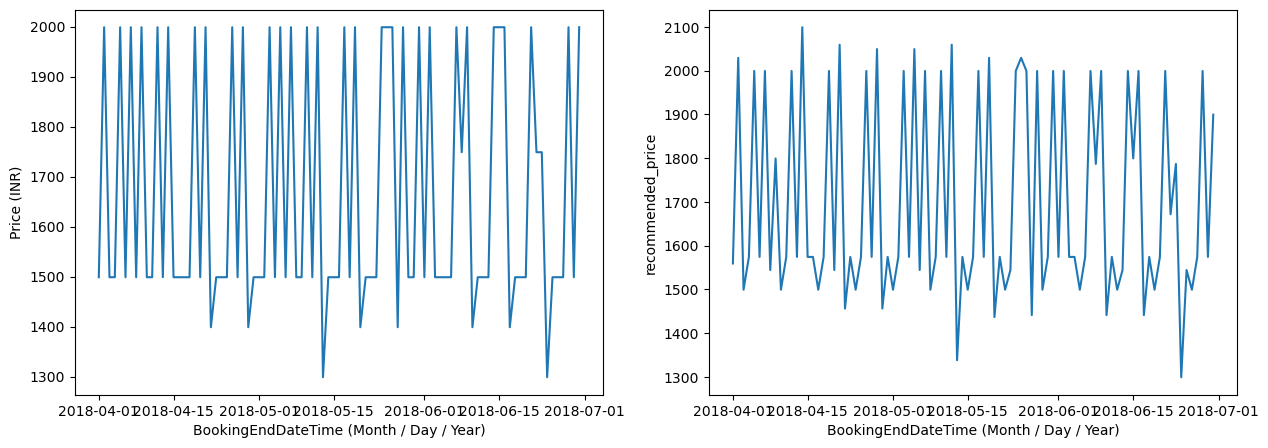

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(data= df.groupby('BookingEndDateTime (Month / Day / Year)')['Price (INR)'].median())
plt.subplot(1,2,2)
sns.lineplot(data= df.groupby('BookingEndDateTime (Month / Day / Year)')['recommended_price'].median())

Every decrease in Price will bring +ve 5% booking.

We have made increament in Price ccording to Occupancy , Site and Revenue, Booking Start Time, Day and Activities